In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
#loading dataset
dataset=pd.read_csv('yelp.csv')

In [5]:
dataset.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [7]:
dataset.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
dataset['text length']=dataset['text'].apply(len)

In [9]:
dataset.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


In [10]:
dataset['text length'].describe()

count    10000.000000
mean       714.199700
std        620.863509
min          1.000000
25%        295.000000
50%        544.000000
75%        936.000000
max       5039.000000
Name: text length, dtype: float64

In [12]:
import seaborn as sns
sns.set_style('white')

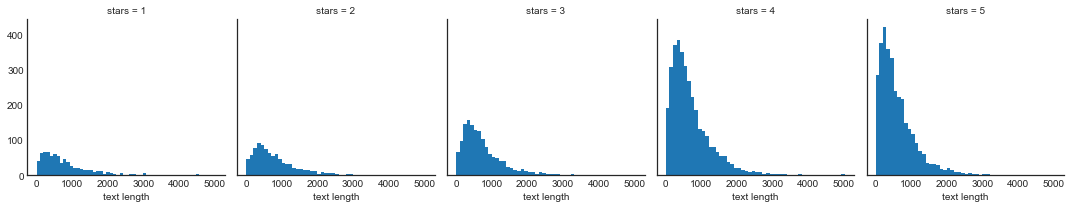

In [18]:
g=sns.FacetGrid(dataset,col='stars')
g.map(plt.hist,'text length',bins=50)

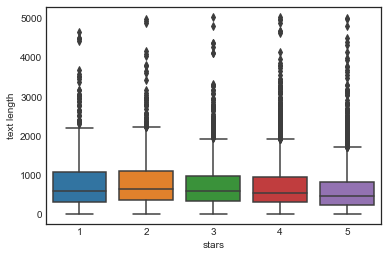

In [19]:
sns.boxplot(x='stars',y='text length',data=dataset)

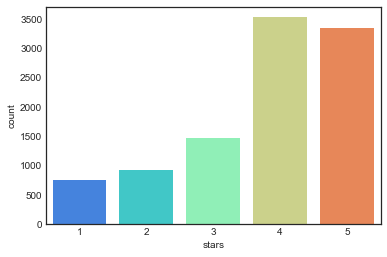

In [23]:
sns.countplot(x='stars',data=dataset,palette='rainbow')

In [25]:
stars=dataset.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,830.244326
2,0.719525,1.563107,0.875944,846.249191
3,0.788501,1.306639,0.694730,762.325120
4,0.954623,1.395916,0.670448,716.493193
5,0.944261,1.381780,0.608631,627.976925


In [28]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.856995
useful,-0.743329,1.000000,0.894506,0.698743
funny,-0.944939,0.894506,1.000000,0.842585
text length,-0.856995,0.698743,0.842585,1.000000


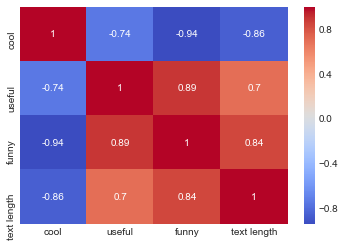

In [30]:
sns.heatmap(stars.corr(),annot=True,cmap='coolwarm')

In [31]:
dataset_class=dataset[(dataset['stars']==1) | (dataset['stars']==5)]

In [32]:
dataset_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [43]:
X=dataset_class['text']
y=dataset_class['stars']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [45]:
X=cv.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
models=MultinomialNB()

In [55]:
models.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
predictions=models.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
confusion_matrix(y_test,predictions)

array([[145,  86],
       [ 33, 962]])

In [65]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.81      0.63      0.71       231
          5       0.92      0.97      0.94       995

avg / total       0.90      0.90      0.90      1226



# Using Text Processing

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
pipeline=Pipeline([
     ('bow',CountVectorizer()),
     ('tfidf',TfidfTransformer()),
     ('model',MultinomialNB())
])

In [70]:
X=dataset_class['text']
y=dataset_class['stars']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [72]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [75]:
predictions=pipeline.predict(X_test)

In [78]:
confusion_matrix(y_test,predictions)

NameError: name 'confusion_report' is not defined

In [79]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       231
          5       0.81      1.00      0.90       995

avg / total       0.66      0.81      0.73      1226



/home/krishn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
